# Autoencoders

This code include implementations of various simple autoencoders using the Keras frontend to TensorFlow.
You should first run all of the code on the MNIST data, and gain a basic understanding of what everything is doing. 
Then, carry out the simple experiments described in Problem 2 of the assignment.

The starter code for this assignment is from [https://github.com/ardendertat/Applied-Deep-Learning-with-Keras](https://github.com/ardendertat/Applied-Deep-Learning-with-Keras). For Keras documentation, see [https://keras.io](https://keras.io).



In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.regularizers import l1
from keras.optimizers import Adam

Using TensorFlow backend.


## Utility functions

_[your documentation goes here]_


In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    plt.figure(figsize=(2*n, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()


## Read the data
_[your documentation goes here]_

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Shallow autoencoder
_[your documentation goes here]_

In [4]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.1628
Epoch 2/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.1059
Epoch 3/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0977
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0962
Epoch 5/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0957


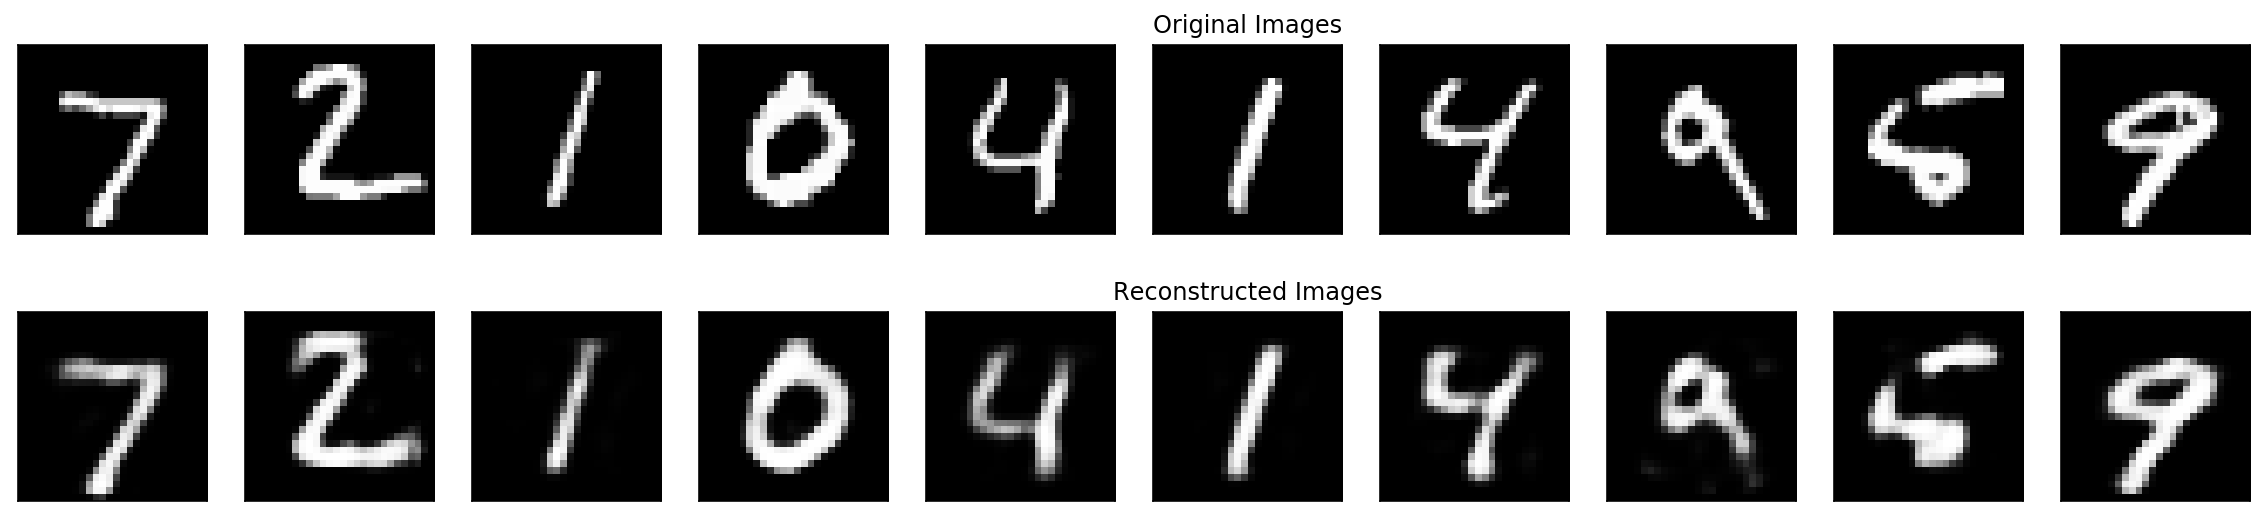

In [5]:
plot_autoencoder_outputs(autoencoder, 10, (28, 28))

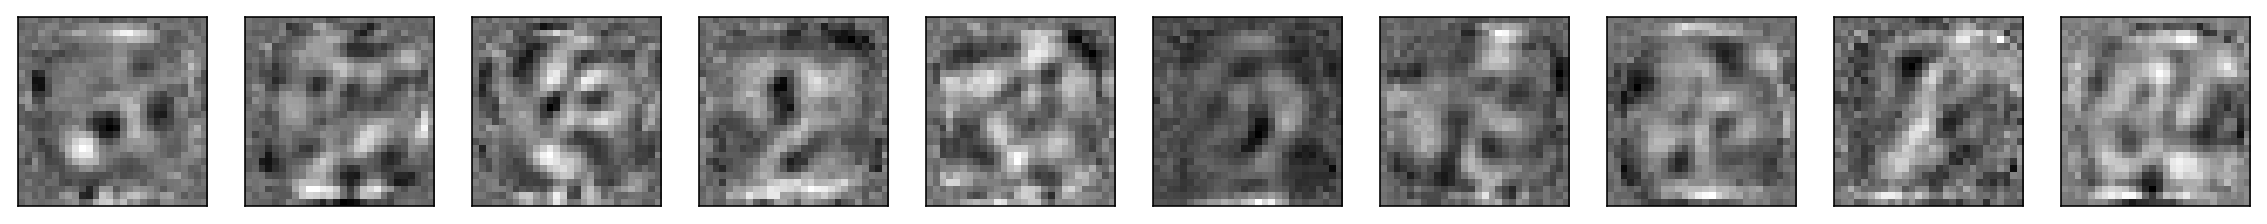

In [6]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+20].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results
_[your description goes here]_

## Deep Autoencoder
_[your documentation goes here]_


In [7]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.1399
Epoch 2/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.1007
Epoch 3/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0950
Epoch 4/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0921
Epoch 5/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0903
Epoch 6/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0889
Epoch 7/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0879
Epoch 8/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0871
Epoch 9/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0864
Epoch 10/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0859


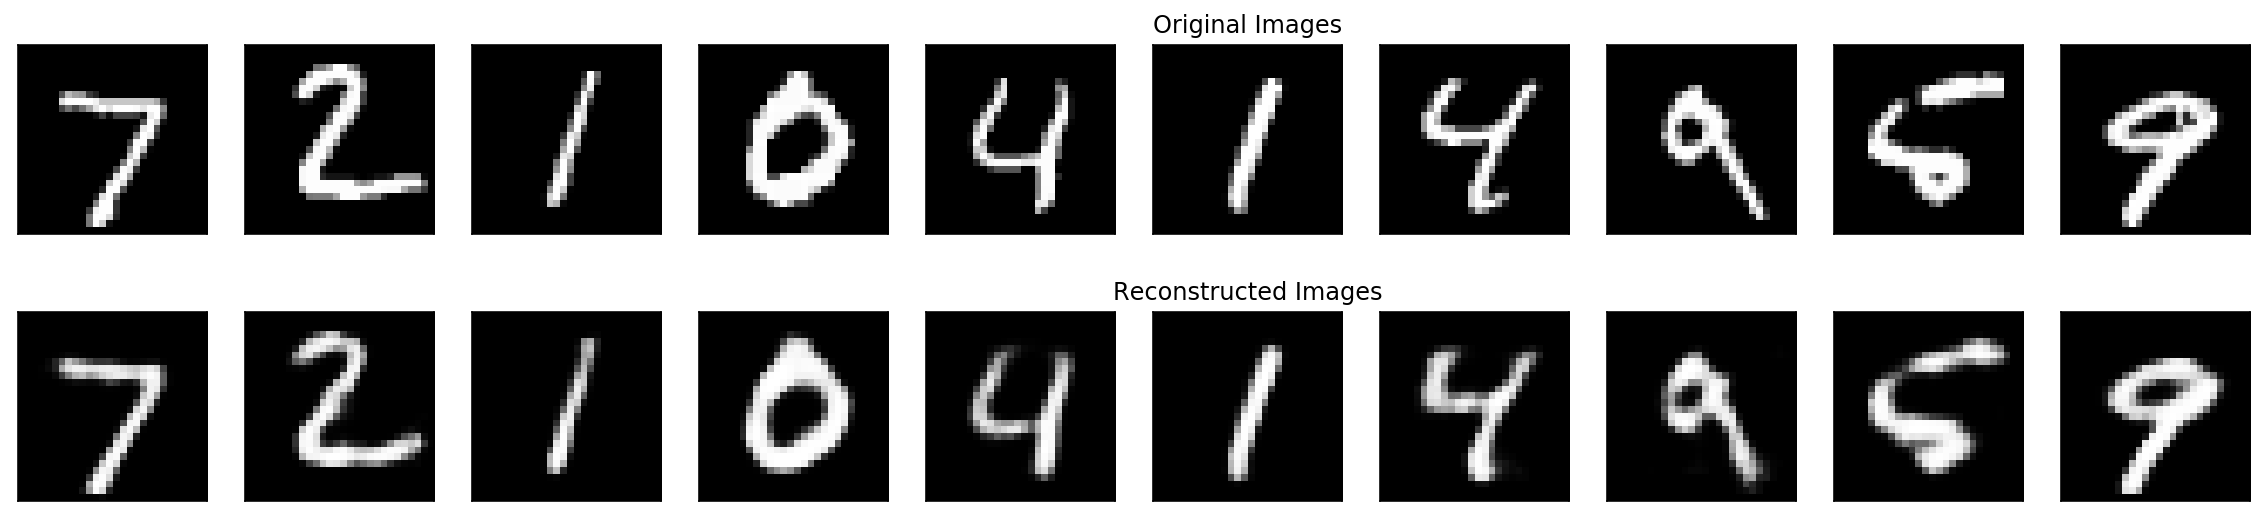

In [8]:
plot_autoencoder_outputs(autoencoder, 10, (28, 28))

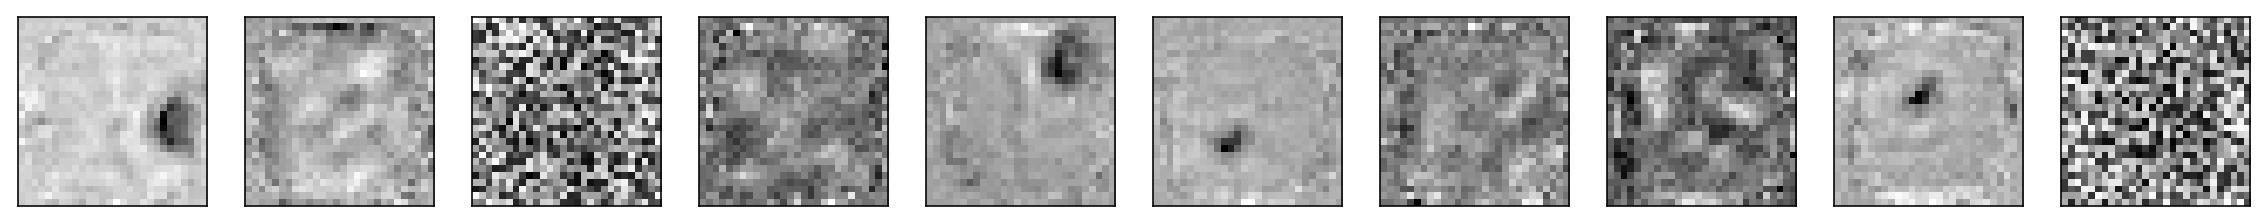

In [9]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Discussion of above results
_[your description goes here]_

## Denoising autoencoder
_[your documentation goes here]_


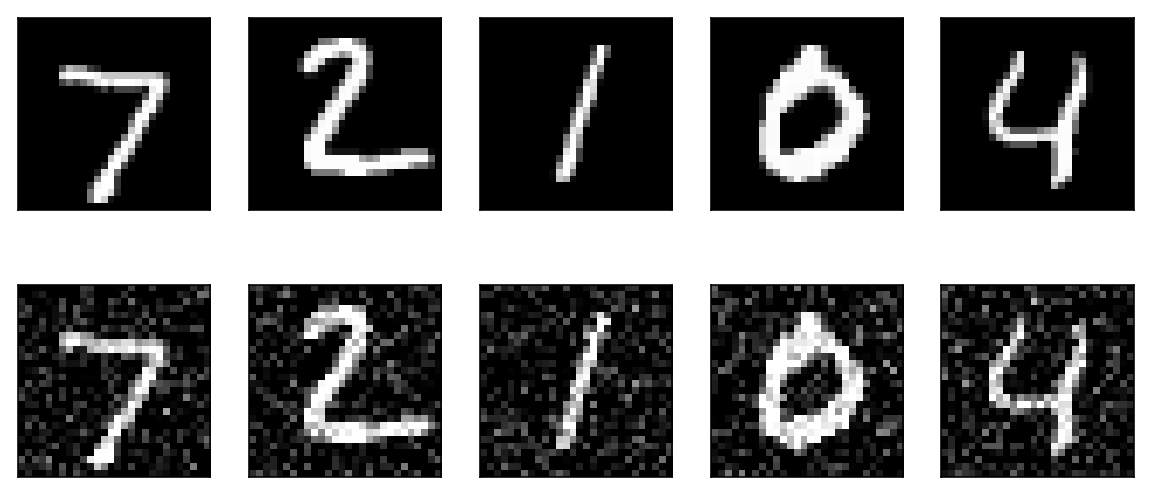

In [11]:
noise_factor = 0.20
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [12]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1491
Epoch 2/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1104
Epoch 3/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.1043
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1012
Epoch 5/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0990
Epoch 6/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0976
Epoch 7/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0966
Epoch 8/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0958
Epoch 9/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0951
Epoch 10/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0945


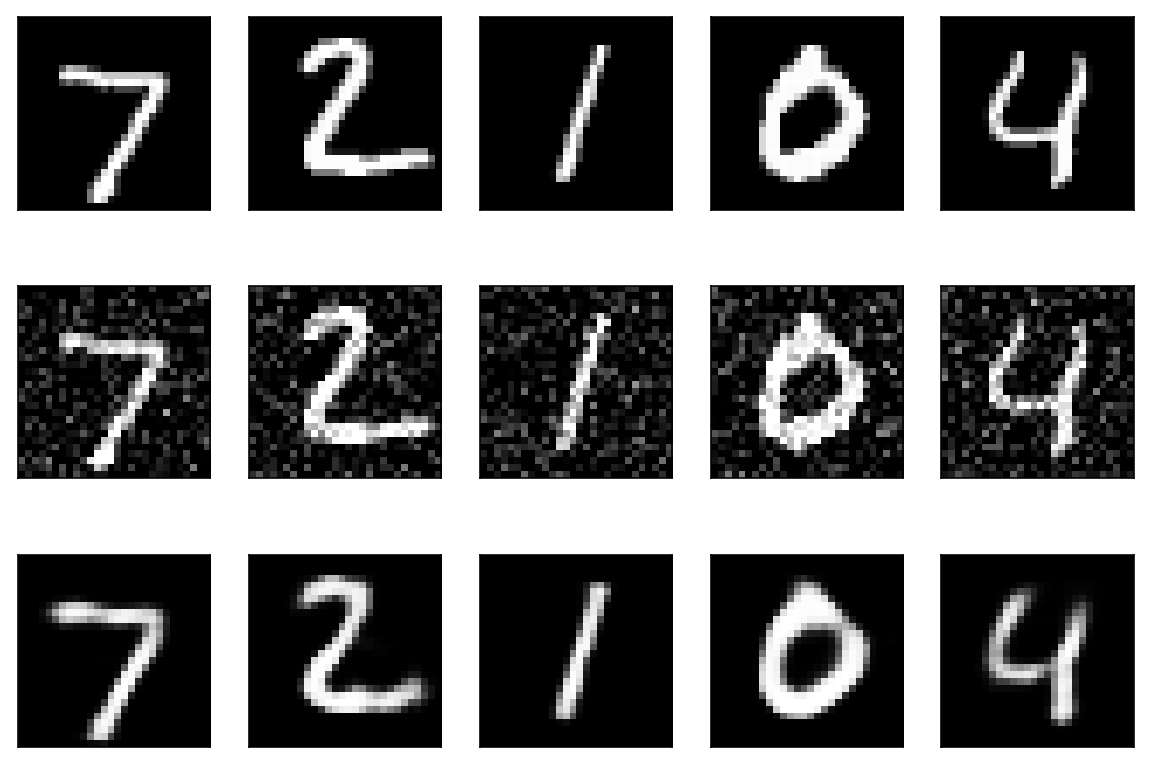

In [13]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

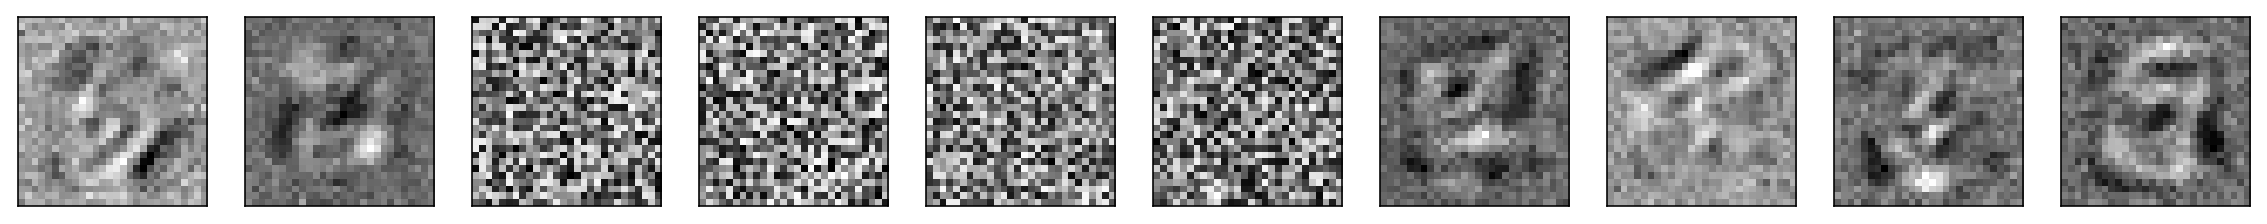

In [14]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


## Discussion of above results
_[your description goes here]_

## Sparse autoencoders
_[your documentation goes here]_

In [15]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_standard = Model(input_img, output_img)
autoencoder_standard.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_standard.fit(x_train, x_train, epochs=20)

encoded_standard = Model(input_img, code)

Epoch 1/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.1366
Epoch 2/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0981
Epoch 3/20
60000/60000 [==============================] - 17s 275us/step - loss: 0.0929
Epoch 4/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0902
Epoch 5/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0883
Epoch 6/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.0867
Epoch 7/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0856
Epoch 8/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0848
Epoch 9/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0842
Epoch 10/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0837
Epoch 11/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0833
Epoch 12/20
60000/60000 [=====

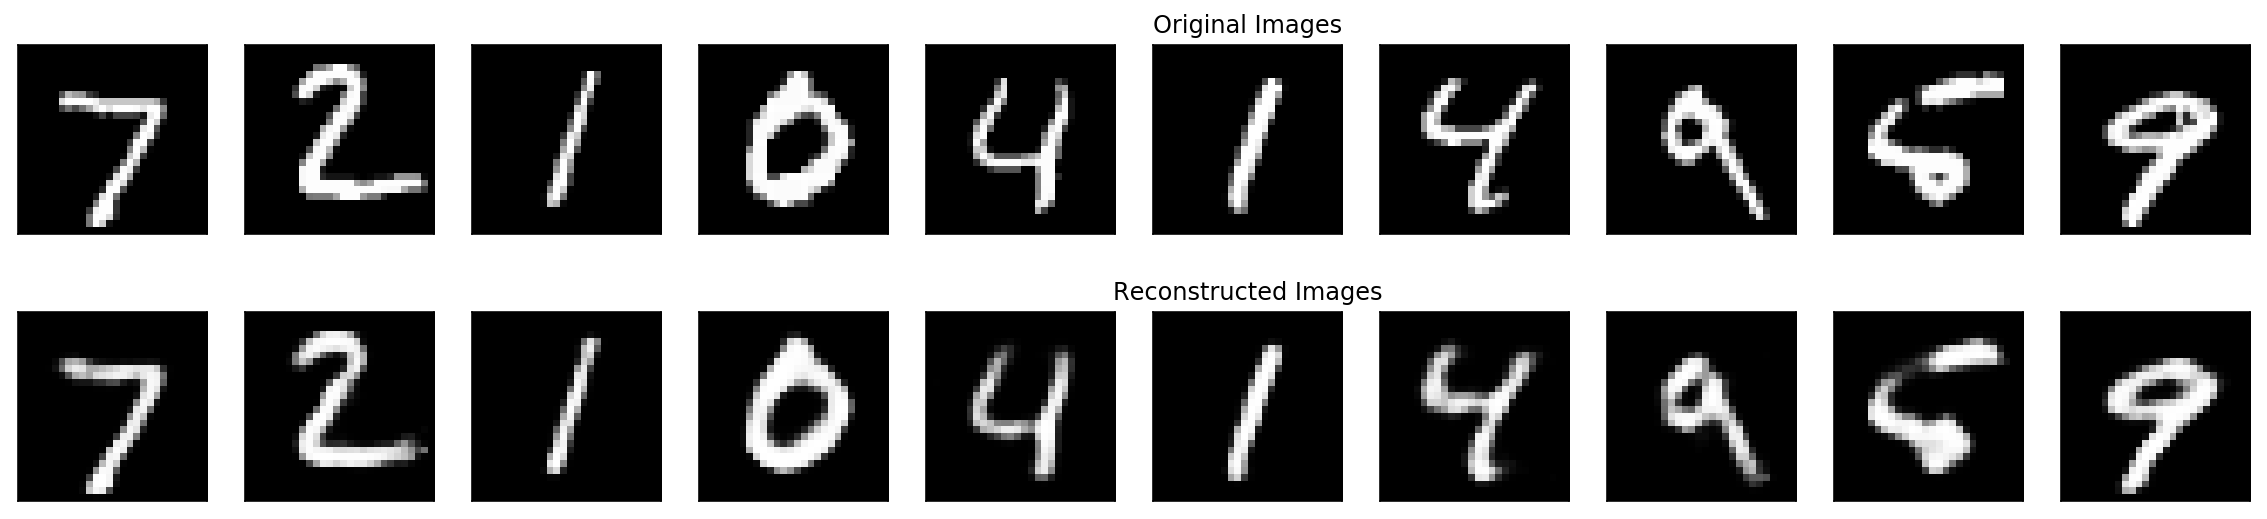

In [16]:
plot_autoencoder_outputs(autoencoder_standard, 10, (28, 28))

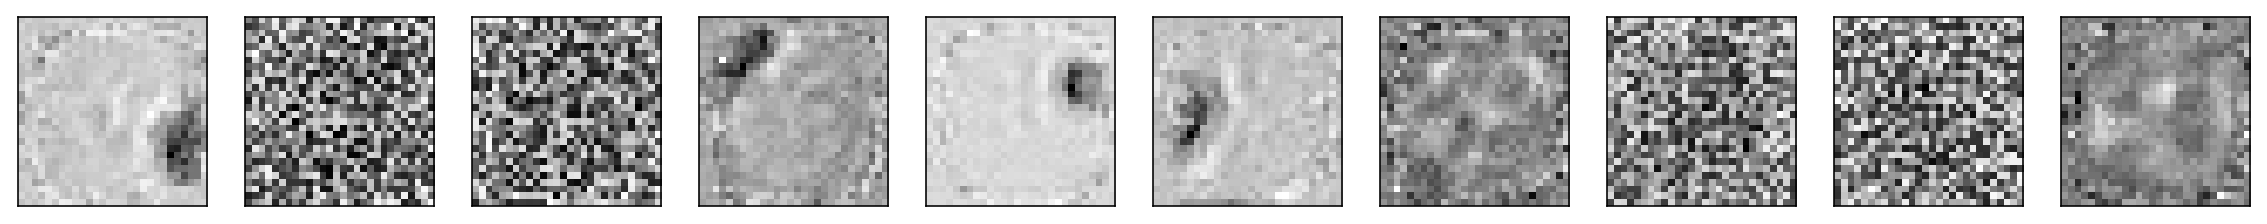

In [17]:
weights = autoencoder_standard.get_weights()[0].T

n = 10
plt.figure(figsize=(n*2, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [18]:
input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu', activity_regularizer=l1(10e-6))(input_img)
code = Dense(code_size, activation='relu', activity_regularizer=l1(10e-6))(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_regularized = autoencoder_regularized.fit(x_train, x_train, epochs=20)

encoded_regularized = Model(input_img, code)

Epoch 1/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1708
Epoch 2/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.1259
Epoch 3/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.1168
Epoch 4/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.1110
Epoch 5/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.1070
Epoch 6/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1041
Epoch 7/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.1022
Epoch 8/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.1008
Epoch 9/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0997
Epoch 10/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.0988
Epoch 11/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0980
Epoch 12/20
60000/60000 [=====

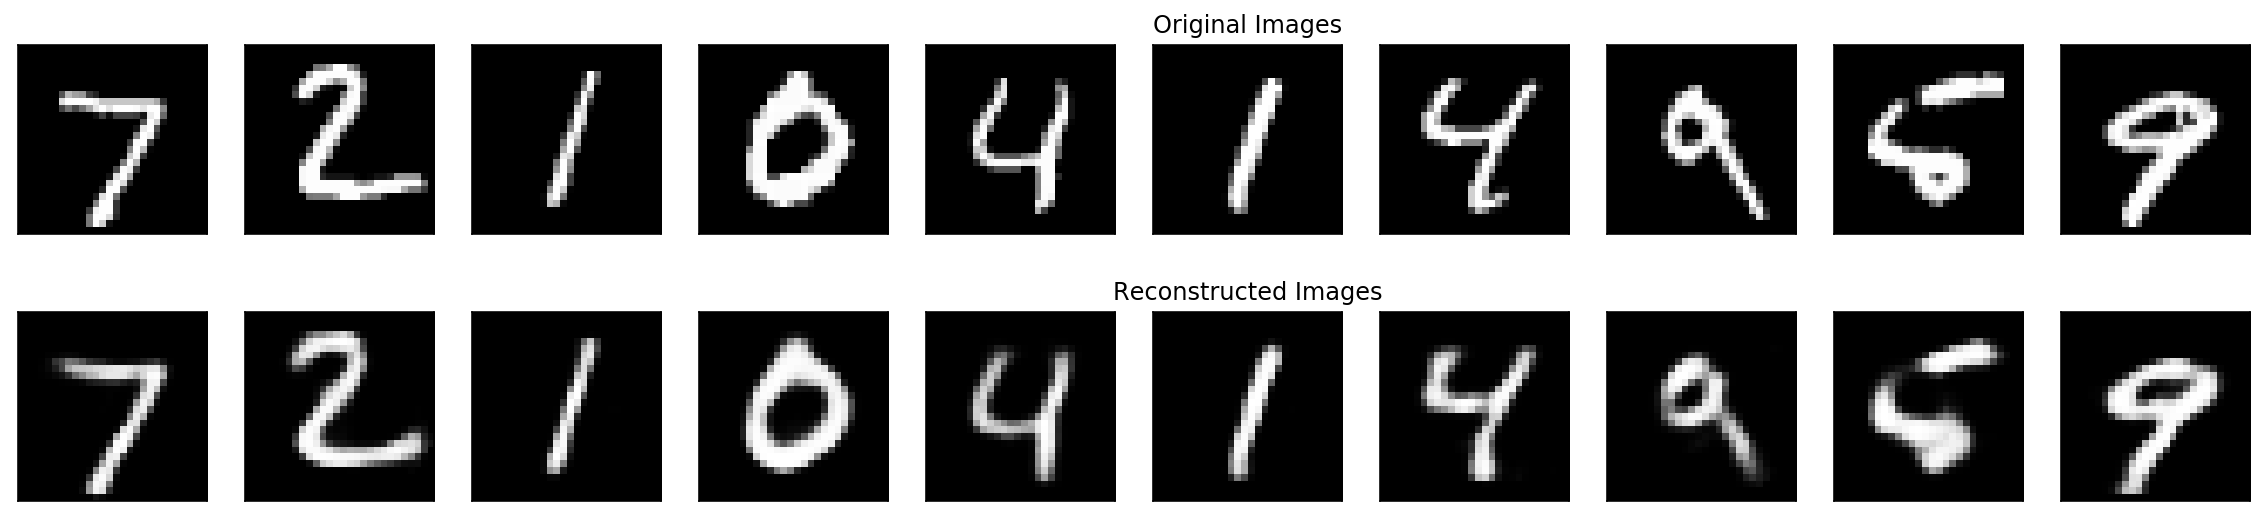

In [19]:
plot_autoencoder_outputs(autoencoder_regularized, 10, (28, 28))

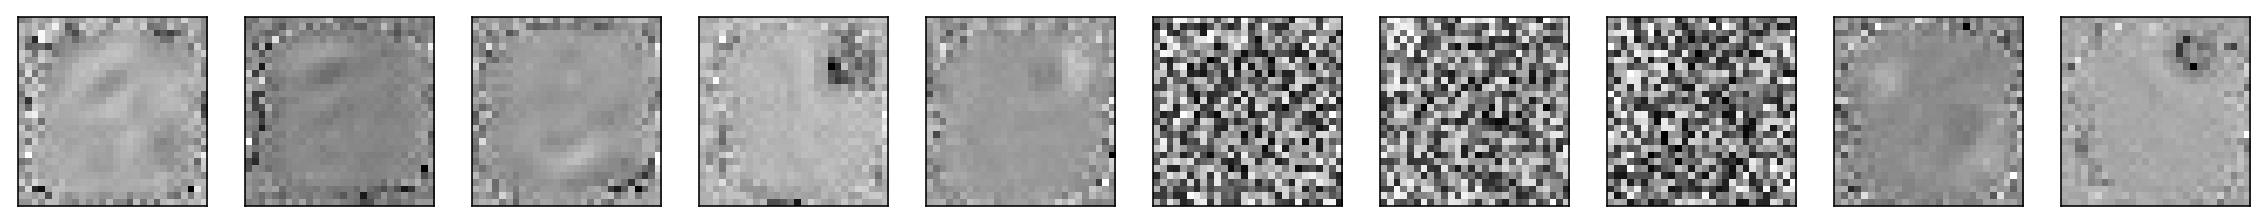

In [20]:
weights = autoencoder_regularized.get_weights()[0].T

n = 10
plt.figure(figsize=(2*n, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results
_[your description goes here]_

## Evaluation metrics
_[your documentation goes here]_

In [21]:
autoencoder_standard.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 88us/step


0.08079411675930023

In [22]:
autoencoder_regularized.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 94us/step


0.09291144703626633

In [23]:
print(encoded_standard.predict(x_test).mean())
print(encoded_regularized.predict(x_test).mean())

6.3761926
0.28598148


## Training a series of shallow networks of varying complexity

Your final task is to train a sequence of shallow networks, varying the code size parameter.
Plot the training error and test error as a function of the code size. Describing your findings. Interpret them in terms of the bias/variance tradeoff. 
